# Introducción a Computer Vision

* Vamos a usar open cv
* Vamos a aprender los usos básicos y algunos más avanzados
* *TODO*


<img src="resources/opencv-logo.png" style="width:100px; height:130px;">

# La librería `OpenCV` 

[OpenCV](https://opencv.org/) ("Open Computer Vision") es una librería de código abierto de computer vision (visión artificial) desarrollada originalmente por Intel. Implementada en `C++` pero con APIs en multiples lenguajes, con soporte multiplataforma, es una de las librerías más populares y utilizadas de computer vision. Incluye una gran cantidad de funcionalidad relacionada a la visión artificial, una parte de la cual veremos hoy en esta clase.

La clase se desarrollará como sigue:
* [Leer, entender y mostrar imágenes](#Leer,-entender-y-mostrar-imágenes)
* [Espacios de colores](#Espacios-de-colores)
* [Métodos de manipulación comunes en Computer Vision](#Métodos-de-manipulación-comunes-en-Computer-Vision)
  * Filtro gaussiano
  * Detección de bordes
  * Operaciones simples de manipulación (resize, crop, stacking)
* [Figuras geométricas y texto](#Figuras-geométricas-y-texto)
* [Recorte, extracción y rotación](#Recorte,-extracción-y-rotación)
* [Detección de caras (Face detection)](#Detección-de-caras-(Face-detection))


# Instalación e importaciones

Para instalar las librerías que vamos a usar, descomenten la celda de acá abajo y ejecútenla.

Notar que `OpenCV` se instala como `opencv-python` y se importa como `cv2`, lo cual no es lo mejor.


In [2]:
#!pip install matplotlib opencv-python watermark

In [3]:
# Importamos las librerías
import cv2
import numpy as np
import matplotlib.pyplot as plt

[watermark](https://github.com/rasbt/watermark) es una extensión de las "magic functions" de jupyter que permite verificar fácilmente la versión de python y de las librerías instaladas.
La notebook está probada con:
```python
Python version : 3.7.13
cv2            : 4.6.0
numpy          : 1.21.6
matplotlib     : 3.5.3
```

In [4]:
%load_ext watermark
%watermark
%watermark --iversions

Last updated: 2022-09-07T23:36:59.394307-03:00

Python implementation: CPython
Python version       : 3.7.13
IPython version      : 7.34.0

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 5.15.0-46-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 12
Architecture: 64bit

numpy     : 1.21.6
cv2       : 4.6.0
matplotlib: 3.5.3



# Leer, entender y mostrar imágenes

Ahora sí, ¡empecemos!

Lo primero que tenemos que hacer es cargar una imagen desde el disco rígido. Para hacerlo, usamos `cv2.imread()`, que la convierte automáticamente a una matriz de `numpy`. Esto es diferente de, por ejemplo, la librería PIL, que levanta las imagenes en un formato específico de la librería. En el mundo de OpenCV vamos a estar trabajando siempre con matrices numéricas de numpy

In [5]:
img = cv2.imread("resources/lena.png")
type(img)

numpy.ndarray

In [6]:
img.shape

(512, 512, 3)

¿Qué son estas dimensiones?

Las primeras dos son el alto (_height_) y el ancho (_width_) de la imagen. En este caso tenemos una imagen de _512_ pixeles de alto por _512_ pixeles de ancho. 

El pixel es es la menor unidad homogénea en color que forma parte de una imagen digital. Es un puntito de un color único sólido, el "átomo" del que está hecha la imagen. La forma en que se códifica el color de cada pixel, es usando el conocido espacio de colores RGB con tres números: uno nos va a decir cuánto rojo tiene el pixel, otro cuánto verde y otro cuanto azúl. Rojo, verde y azul son los colores primarios de la luz y componiendolos en términos de intensidad de cada uno de ellos podemos reproducir todo el espectro de colores. Por convención, se usan números entre 0 y 255.

In [7]:
# El pixel de la esquina superior izquierda tiene 125 azul, 137 verde y 226 rojo
# ¿Por qué 125 azul y no 125 rojo? OpenCV usa BGR, lo aclaramos abajo
img[0, 0]

array([125, 137, 226], dtype=uint8)

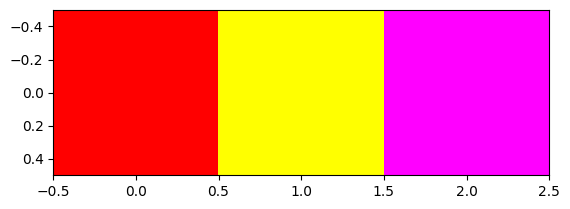

In [8]:
# Acá pueden jugar definiendo pixeles y mostrandolos

# Todo rojo, nada de verde, nada de azul ==> rojo
pixel1 = [255, 0, 0]

# Todo rojo, todo verde, nada de azul ==> amarillo
pixel2 = [255, 255, 0]

# Todo rojo, nada verde, todo azul ==> purpura
pixel3 = [255, 0, 255]

plt.imshow([[pixel1, pixel2, pixel3]]);

**Mostrar con OpenCV**

Para mostrar una imagen con opencv usamos `cv2.imshow()`. 

OpenCV abre una ventana flotante. Para poder cerrarla nosotros y que no se cierre sola, agregamos un loop que verifica si se presiona una tecla cualquiera y cierra la ventana en ese escenario. El código necesario es un poco técnico, pero es siempre el mismo boilerplate.

In [9]:
cv2.imshow("Window", img)

while(True):
    k = cv2.waitKey(0)
    # si ninguna tecla fue presionada, retorna -1
    if k == -1:  
        continue
    else:
        break
cv2.destroyAllWindows()

Verifiquemos que los componentes RGB del píxel superior izquierdo con la función de zoom

**Mostrar con matplotlib**

Como ya adelantamos al mostrar los pixeles, para mostrar una matriz de numpy como una imagen `RGB` con matplotlib, usamos `imshow`.

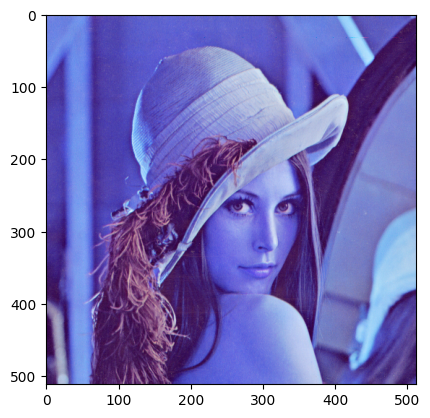

In [10]:
plt.imshow(img);

# Espacios de colores

Ok, la imagen está un poco azul...

Esto es porque opencv trabaja con las imágenes en el espacio de colores BGR (Blue, Green, Red)

Matplotlib, por su parte, como muchas otras librerías, trabaja en RGB (Red, Green, Blue)

Para pasar de un espacio de colores a otro, usamos `cv2.cvtColor()`

In [11]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

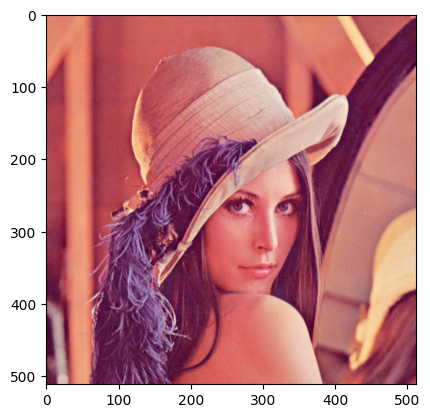

In [12]:
# ¡Ahora sí!
plt.imshow(img_rgb);

Notar que esta transformación no es más que transponer los canales Blue por Red (esto es el primer canal pasarlo al final y el último canal pasarlo al principio), lo que también podemos hacer así:

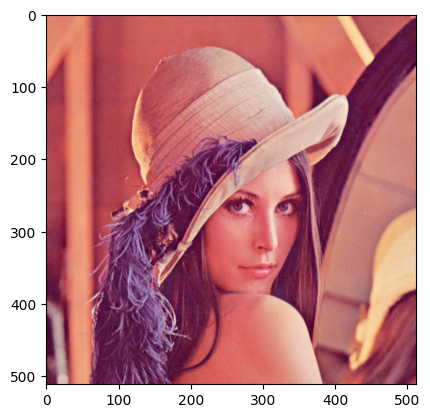

In [13]:
plt.imshow(img[:, :, [2, 1, 0]]);

Pero existen otros espacios de colores... y movernos a ellos no es una transformación tan sencilla.

Por ejemplo, pasar de BGR a escala de grises implica reducir los tres canales de colores a uno solo:

In [14]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray.shape

(512, 512)

Para esta transformación, la imagen perdió información y ahora cada pixel es simplemente un número entre 0 y 255 indicando "cuánto de blanco" hay en el pixel:

In [15]:
img_rgb[0:2, 0:2]

array([[[226, 137, 125],
        [226, 137, 125]],

       [[226, 137, 125],
        [226, 137, 125]]], dtype=uint8)

In [16]:
img_gray[0:2, 0:2]

array([[162, 162],
       [162, 162]], dtype=uint8)

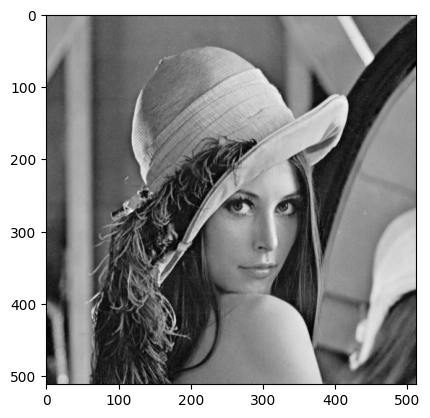

In [17]:
plt.imshow(img_gray, cmap='gray');

Existen [otros espacios de colores](https://es.wikipedia.org/wiki/Espacio_de_color) como el CMYK (Cyan, Magenta, Yellow, Key) utilizado en impresión y el HSV (Hue, Saturation, Value) cuya codificación es a veces mucho más cercana a las intuciones humanas del color (cuando lo usemos más adelante vamos a ver con claridad este caracter más "intuitivo" de HSV).

Todas las transformaciones de espacios de color a otros se hacen con:
`img_dst = cv2.cvtColor(img_src, cv2.COLOR_...)`

# Métodos de manipulación comunes en Computer Vision

## Filtro gaussiano

El filtro gaussiano desenfoca o suaviza la imagen tratada. En inglés se conoce como "blur", "gaussian blur", o "gaussian smoothing". 

Es un efecto ampliamente utilizado en procesamiento de imagenes, ya que sirve para suavizar los bordes y eliminar ruido, aun con el costo evidente de una pérdida de nitidez y de un aumento de indefinición de las formas. En concreto, el filtro mezcla ligeramente los colores de los píxeles vecinos unos con otros, logrando esta perdida de detalle caracteristica del desenfoque.

El filtrado gaussiano se utiliza comunmente como un paso previo a la detección de bordes, ya que los algoritmos de detección de bordes son muy sensibles al ruido.

Para utilizar esta técnica, usamos la funcion `cv2.GaussianBlur()`, que recibe como primer parámetro la imagen que queremos desenfocar y, como segundo parametro, una tupla con dos números que deben ser impares. A más grande estos números, mayor el nivel de desenfoque.

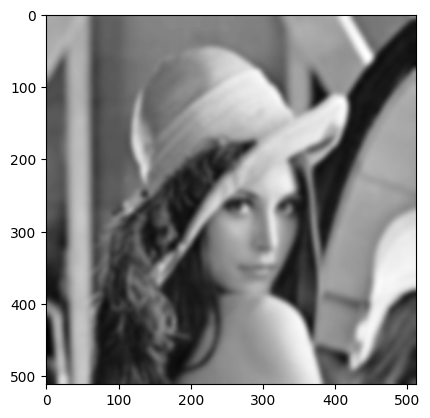

In [18]:
img_blur = cv2.GaussianBlur(img_gray, (21, 21), 0)
plt.imshow(img_blur, cmap='gray');

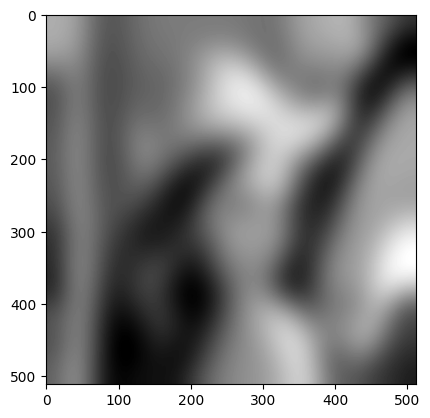

In [19]:
img_blur = cv2.GaussianBlur(img_gray, (151, 151), 0)
plt.imshow(img_blur, cmap='gray');

## Detección de bordes

La función de detección de bordes nativa de OpenCV utiliza el [Algoritmo de Canny](https://es.wikipedia.org/wiki/Algoritmo_de_Canny), una conocida técnica multi-etapa inventada por John F. Canny en 1986. La primera etapa de este algoritmo es un filtrado gaussiano de tamaño (5, 5) - no hace falta hacerla previamente porque el proceso la hace automáticamente.

Para usar esta función llamamos a [`cv2.Canny()`](https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html). El primer parámetro es la imagen en la que queremos detectar los bordes. El segundo y el tercer parámetro configuran la sensibilidad del algoritmo. Valores típicos son: `(100, 200)`, `(50, 100)`, `(150, 200)`. El tercero debe ser más alto que el primero (uno es un mínimo y otro es un máximo). Valores bajos harán al algoritmo más sensible (esto es, detectará más bordes) y valores más altos harán que detecte menos bordes.

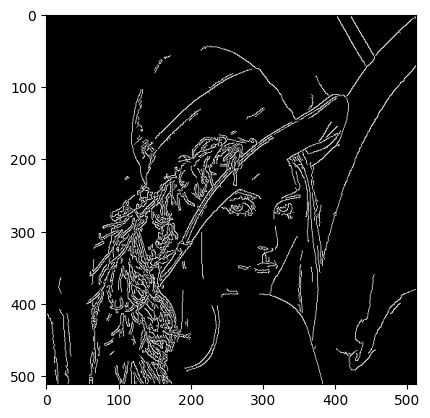

In [20]:
img_canny = cv2.Canny(img_gray, 100, 200)
plt.imshow(img_canny, cmap='gray');

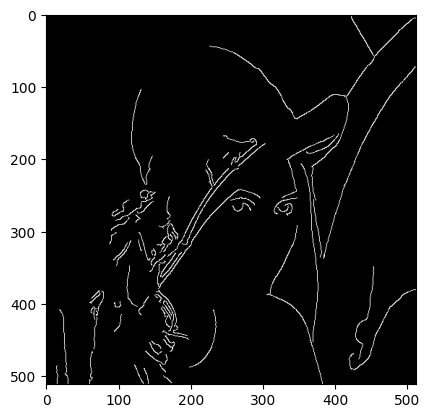

In [21]:
# Podemos ver que agregando un blureado extra
# podemos ayudar al algoritmo a reducir bordes excesivos (por ejemplo, en la zona del sombrero)
img_extra_blur_canny = cv2.Canny(cv2.GaussianBlur(img_gray, (7, 7), 0), 100, 200)
plt.imshow(img_extra_blur_canny, cmap='gray');

Finalmente, podemos usar la función `cv2.dilate` para expandir estos bordes y ganar más visibilidad:

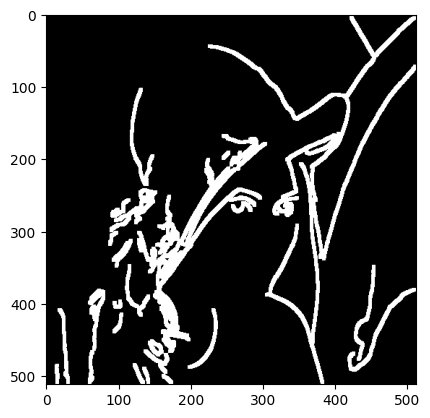

In [22]:
kernel = np.ones((5, 5))
img_dilation = cv2.dilate(img_extra_blur_canny, kernel, iterations=1)
plt.imshow(img_dilation, cmap='gray');


## Operaciones simples de manipulación

**cv2.resize()**

Para cambiar de tamaño una imagen usamos `cv2.resize`

In [23]:
img = cv2.imread("resources/lambo.png")
img.shape

(462, 623, 3)

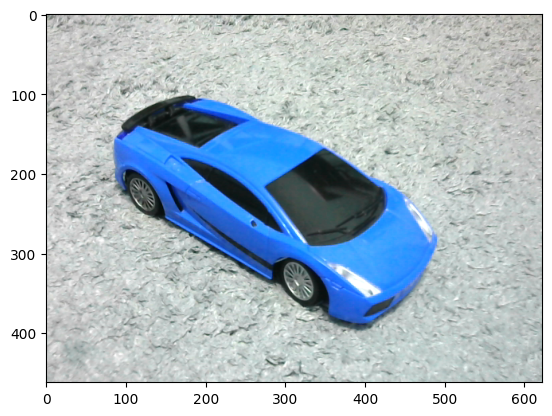

In [24]:
plt.imshow(img);

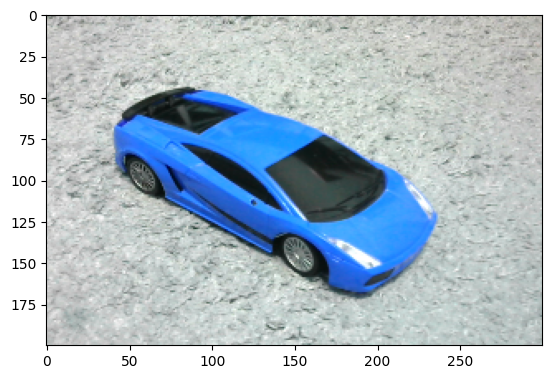

In [25]:
# En resize especificamos primero ancho y despues alto
img_resize = cv2.resize(img, (300, 200))
plt.imshow(img_resize);

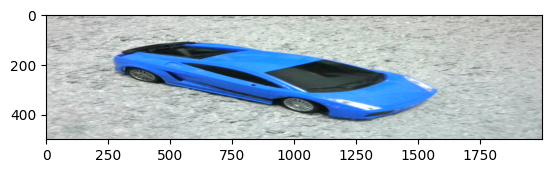

In [26]:
# Primero ancho y despues alto
img_resize2 = cv2.resize(img, (2000, 500))
plt.imshow(img_resize2);

In [27]:
# En los arrays el alto viene primero y el ancho viene despues
img_resize2.shape

(500, 2000, 3)

**Recortar / croppear**

Recortar un sector de una imagen es sencillo, considerando que son arrays simplemente los indexamos

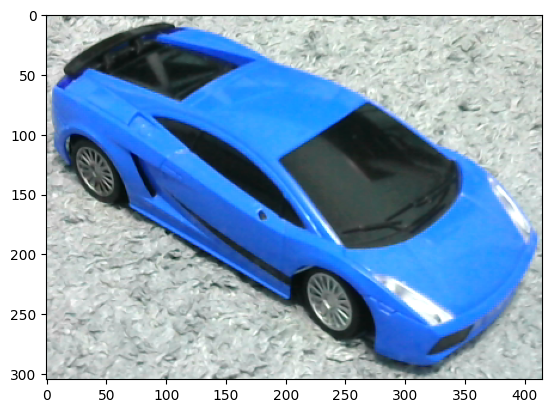

In [28]:
# Primero alto, despues ancho
img_cropped = img[95:400, 80:495]
plt.imshow(img_cropped);

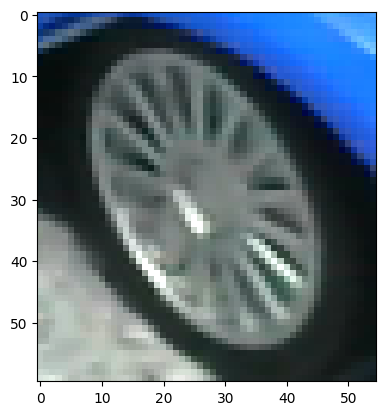

In [29]:
img_cropped = img[305:365, 290:345]
plt.imshow(img_cropped);

**Apilado / stacking**

El apilado no es una técnica de imagenes sino de matrices, pero sirve para imagenes también. Podemos apilar horizontalmente con `np.hstack()` y verticalmente con `np.vstack()`

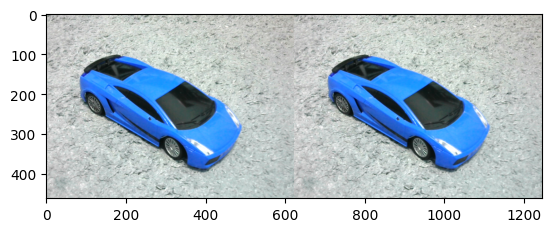

In [30]:
# Apilado horizontal
hor = np.hstack((img, img))
plt.imshow(hor);

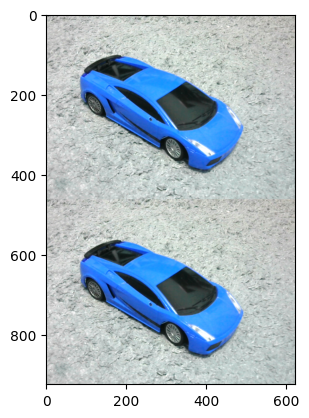

In [31]:
# Apilado vertical
ver = np.vstack((img, img))
plt.imshow(ver);

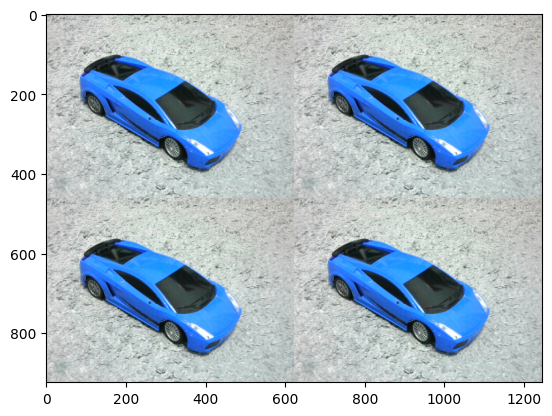

In [32]:
# Apilamos horizontamente dos filas, generando una "matriz" de 2x2
hor2 = np.hstack((ver, ver))
plt.imshow(hor2);

# Figuras geométricas y texto

Empezamos con una imagen negra

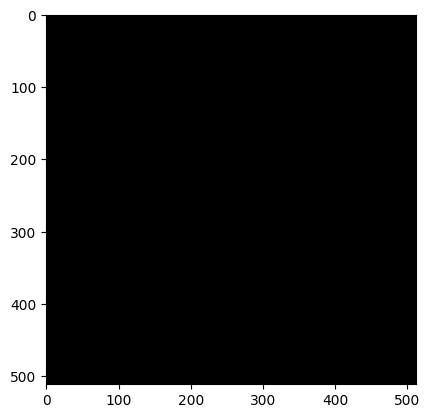

In [33]:
img = np.zeros((512, 512, 3), np.uint8)
plt.imshow(img, cmap='gray');

Para agregar una linea recta usamos `cv2.line()` con los siguientes parametros:
* img: la imagen a la que agregaremos la linea
* pt1: una tupla con las coordenadas en pixeles de donde empieza la linea. Por ejemplo: (0, 0)
* pt2: una tupla con las coordenadas en pixeles de donde termina la linea. Por ejemplo: (10, 50)
* color: una tupla con el color (r, g, b)
* thichness: el alcho de la linea

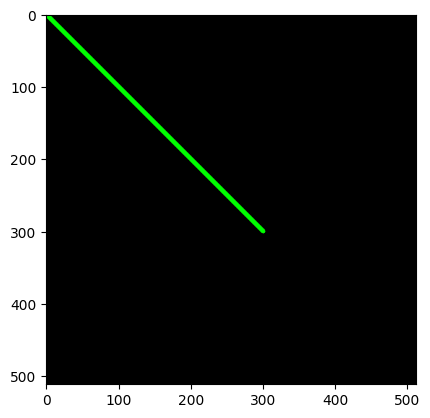

In [34]:
cv2.line(img, pt1=(0, 0), pt2=(300, 300), color=(0, 255, 0), thickness=5)
plt.imshow(img);

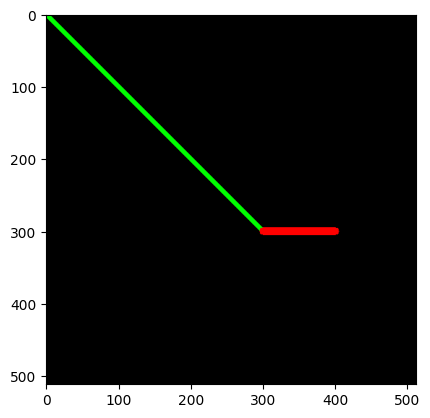

In [35]:
cv2.line(img, pt1=(300, 300), pt2=(400, 300), color=(255, 0, 0), thickness=10)
plt.imshow(img);

Para agregar un rectángulo usamos `cv2.rentangle` con los mismos parametros que usa `cv2.line`. Los dos puntos elegidos, en lugar de definir una linea, van a usarse como dos esquinas del rectángulo:

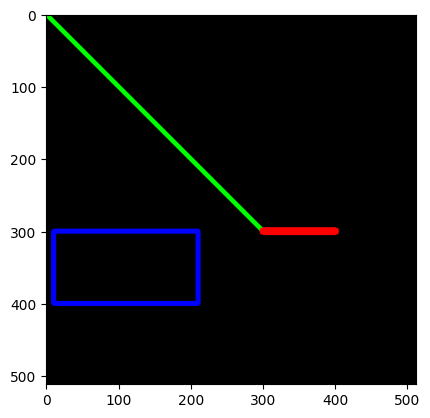

In [36]:
cv2.rectangle(img, (10, 300), (210, 400), (0, 0, 255), 5)
plt.imshow(img);

Para que esté relleno a "thickness" le pasamos de parametro `cv2.FILLED`

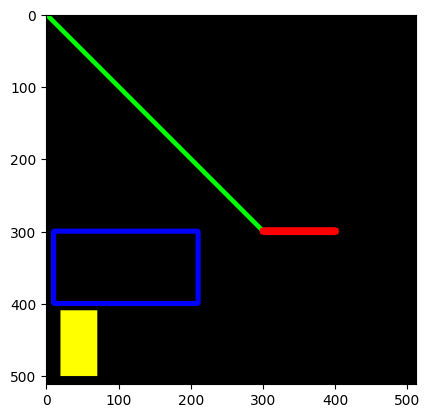

In [37]:
cv2.rectangle(img, (20, 410), (70, 500), (255, 255, 0), cv2.FILLED)
plt.imshow(img);

Para agregar un círculo usamos `cv2.circle` con parámetros:
* img: la imagen a la que agregaremos la linea
* center: tupla con las coordenadas en pixeles de el centro del círculo
* radius: longitud en pixeles del radio del círculo
* color: una tupla con el color (r, g, b)
* thichness: el alcho de la linea

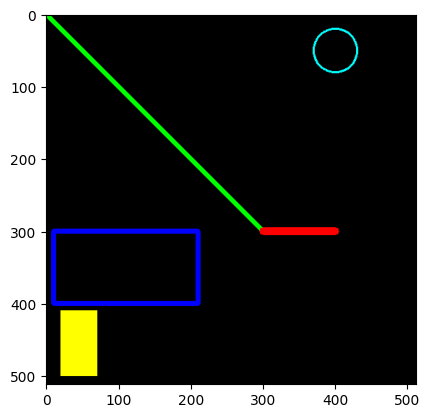

In [38]:
cv2.circle(img, center=(400, 50), radius=30, color=(0, 255, 255), thickness=2)
plt.imshow(img);

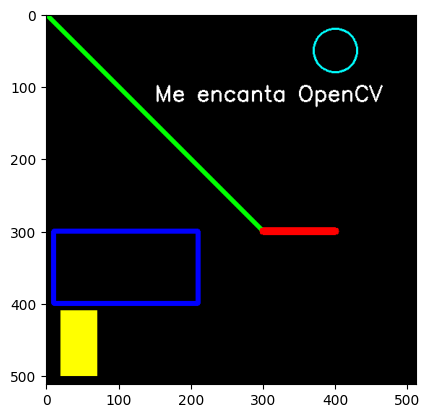

In [39]:
cv2.putText(img, "Me encanta OpenCV", (150, 120),  cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
plt.imshow(img);

# Recorte, extracción y rotación

En esta sección vamos a recortar una de las cartas, extraerla y rotarla para que se vea de frente

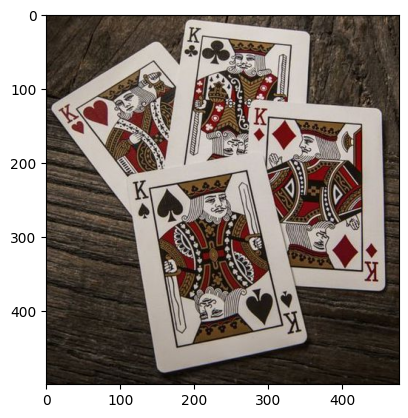

In [40]:
img = cv2.cvtColor(cv2.imread("resources/cards.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(img);

In [41]:
img.shape

(500, 477, 3)

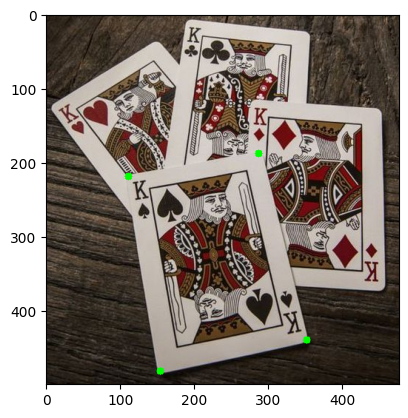

In [42]:
# Estos son las posiciones de las cuatro esquinas de la carta:

for x, y in [(111, 219), (287, 188), (154, 482), (352,  440)]:
    cv2.circle(img, (x,y), radius=0, color=(0, 255, 0), thickness=10)
plt.imshow(img);

In [43]:
w, h = 250, 350

In [44]:
pts1 = np.float32([[111, 219], [287, 188], [154, 482], [352,  440]])
pts2 = np.float32([[0, 0], [w, 0], [0, h], [w, h]])

In [45]:
matrix = cv2.getPerspectiveTransform(pts1, pts2)

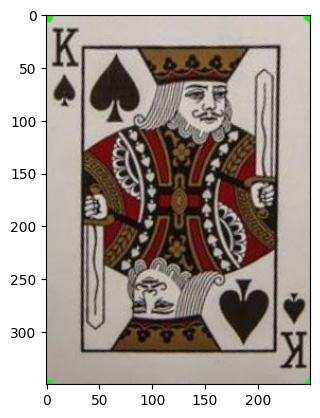

In [46]:
img_output = cv2.warpPerspective(img, matrix, (w, h))
plt.imshow(img_output);

# Detección de caras (Face detection)


Viola and Jones

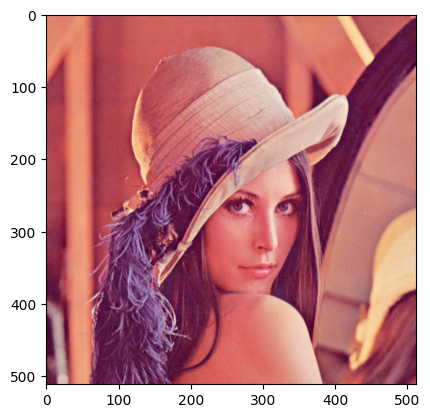

In [47]:
img = cv2.imread("resources/lena.png")
plt.imshow(img[:, :, [2, 1, 0]]);

In [48]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier("resources/haarcascades/haarcascade_frontalface_default.xml")
faces = face_cascade.detectMultiScale(img_gray, 1.1, 4)
len(faces)

1

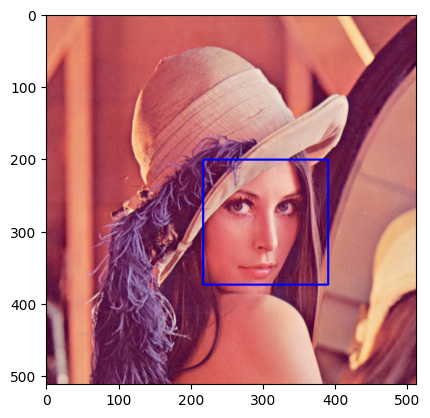

In [49]:
x, y, w, h = faces[0]
cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
plt.imshow(img[:, :, [2, 1, 0]]);

# Video

In [50]:
cap = cv2.VideoCapture("resources/face_mesh.mp4")

In [51]:
while True:
    success, img = cap.read()
    if not success: break
    
    #img_canny = cv2.Canny(img, 100, 200)
    cv2.imshow("Video", img)
    
    if cv2.waitKey(100) != -1:  
        break
cv2.destroyAllWindows()

# Webcam

In [53]:

DEVICE = 0
cap = cv2.VideoCapture(DEVICE)
cap.set(3, 640)
cap.set(4, 480)

# Brightness
cap.set(10, 400)

while True:
    success, img = cap.read()

    if not success: 
        break

    #img_canny = cv2.Canny(img, 200, 300)
    #img = detect_and_add_face(img)
    cv2.imshow("Video", img)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [1]:
def detect_and_add_face(img):
    try:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        face_cascade = cv2.CascadeClassifier("resources/haarcascades/haarcascade_frontalface_default.xml")
        faces = face_cascade.detectMultiScale(img_gray, 1.1, 4)
        x, y, w, h = faces[0]
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    except:
        print("No pude detectar una cara")
    return img